In [1]:
import pandas as pd
import numpy as np
import plotly as pl

In [121]:
df = pd.read_csv('C:\\Users\\Satyam\\Desktop\\Data Science\\Selfstudy\\Tech Mahindra\\Fault Prediction in Diesel Generator\\predictive_maintenance.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [28]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [22]:
df.skew()

C:\Users\Satyam\AppData\Local\Temp/ipykernel_14440/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


UDI                        0.000000
Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
Target                     5.151852
dtype: float64

In [84]:
import matplotlib.pyplot as plt
import seaborn as sn

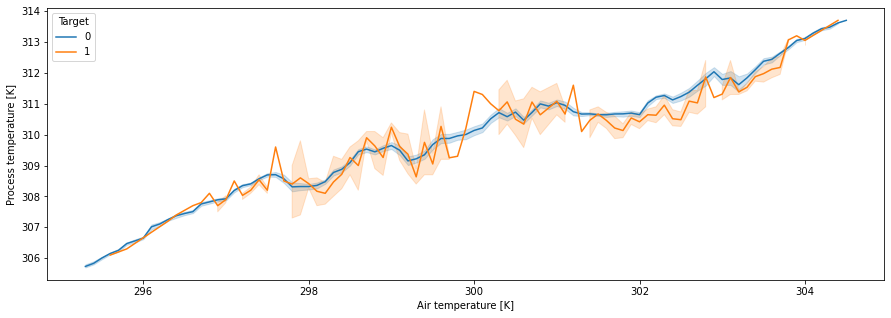

In [90]:
plt.figure(figsize=(15,5))
ax = sn.lineplot(x='Air temperature [K]', y='Process temperature [K]', data=df, hue='Target')

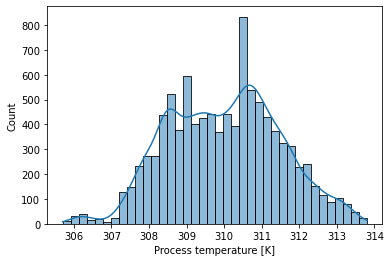

In [88]:
ax = sn.histplot(data=df['Process temperature [K]'],kde=True)

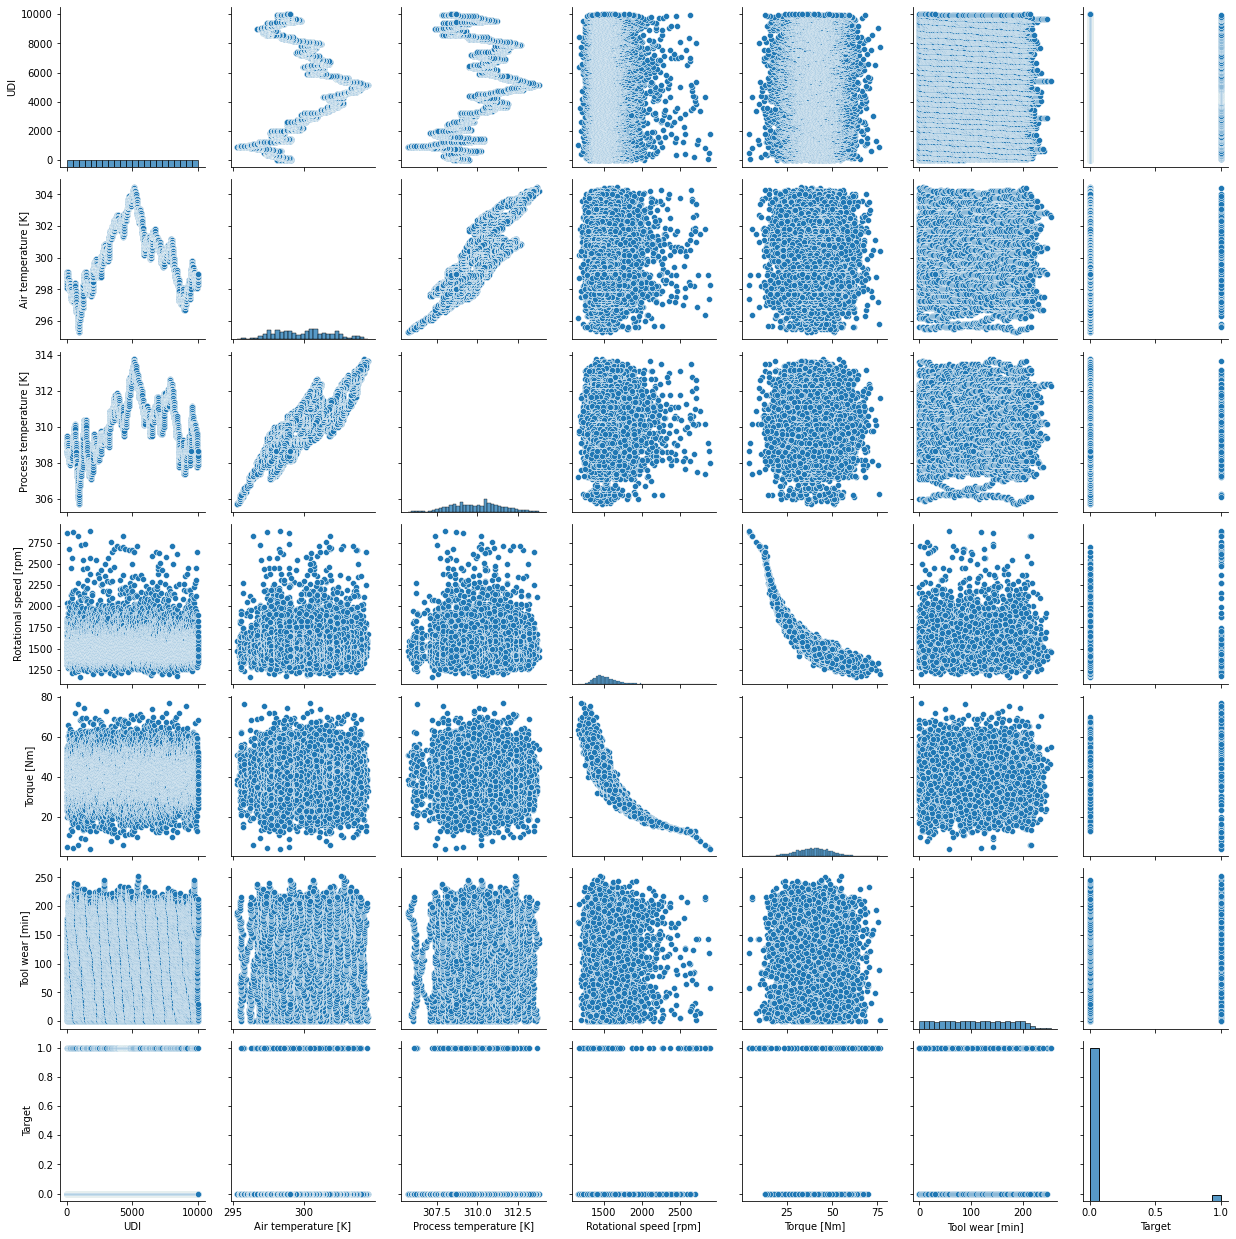

In [89]:
ax = sn.pairplot(df)

In [91]:
df.skew()

C:\Users\Satyam\AppData\Local\Temp/ipykernel_14440/1665899112.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



UDI                        0.000000
Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
Target                     5.151852
dtype: float64

In [99]:
X = df.drop(labels=['UDI', 'Product ID','Failure Type', 'Target'], axis=1)

In [100]:
Y = df['Target']

<AxesSubplot:>

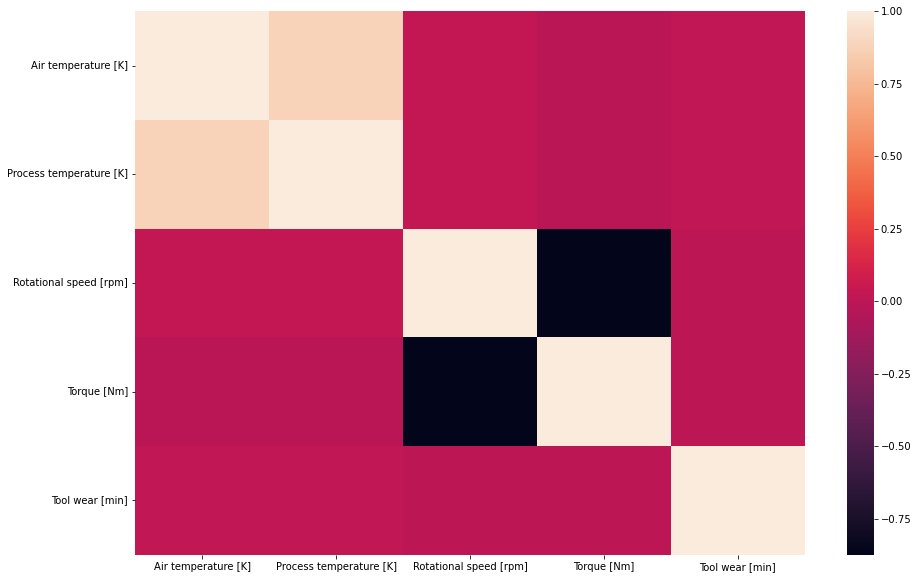

In [101]:
plt.figure(figsize=(15,10))
sn.heatmap(X.corr())

In [102]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9


In [103]:
X.Type.unique()

array(['M', 'L', 'H'], dtype=object)

In [107]:
X['Type'] = df.Type.map({'M':1, 'L':2, 'H':3})

In [108]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,298.1,308.6,1551,42.8,0
1,2,298.2,308.7,1408,46.3,3
2,2,298.1,308.5,1498,49.4,5
3,2,298.2,308.6,1433,39.5,7
4,2,298.2,308.7,1408,40.0,9


In [110]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 10000, dtype: int64

In [112]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_new = sc.fit_transform(X)

In [113]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X_new,Y, random_state=31)

In [122]:
df['Type']=X['Type']

In [123]:
df.head(1)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,1,298.1,308.6,1551,42.8,0,0,No Failure


In [125]:
df.corr()['Target']

UDI                       -0.022892
Type                       0.005152
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.044188
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Target                     1.000000
Name: Target, dtype: float64

In [134]:
data = df.drop(labels=['UDI','Product ID', 'Failure Type'], axis=1)

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Tool wear [min]'>

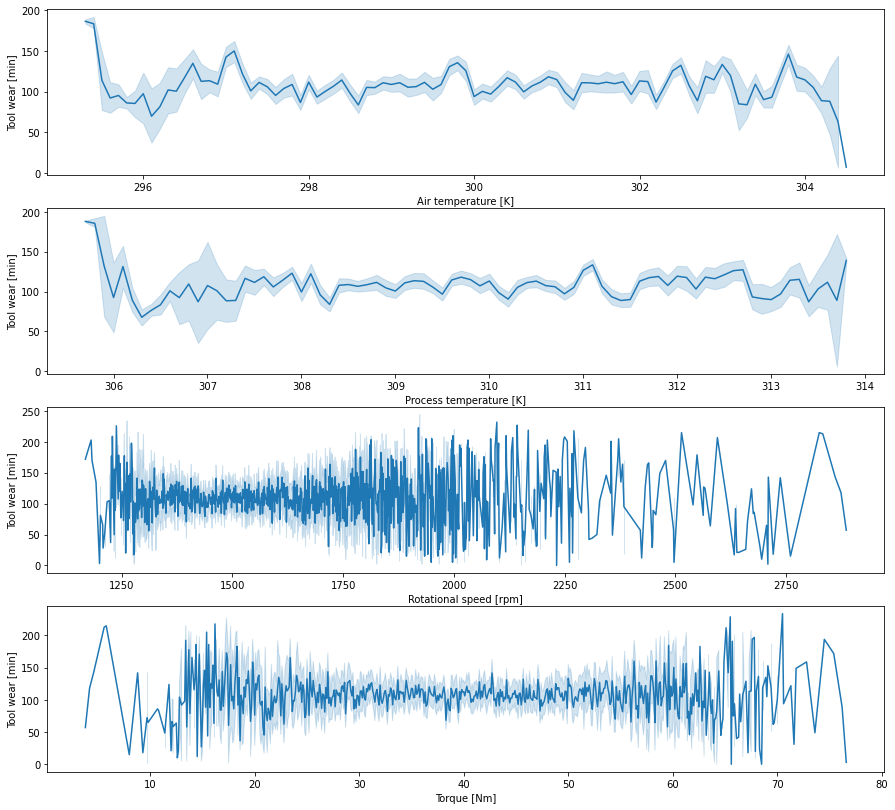

In [144]:
plt.figure(figsize=(15,25))
plt.subplot(7,1,1)
sn.lineplot(x='Air temperature [K]', y='Tool wear [min]', data=data)
plt.subplot(7,1,2)
sn.lineplot(x='Process temperature [K]', y='Tool wear [min]', data=data)
plt.subplot(7,1,3)
sn.lineplot(x='Rotational speed [rpm]', y='Tool wear [min]', data=data)
plt.subplot(7,1,4)
sn.lineplot(x='Torque [Nm]', y='Tool wear [min]', data=data)

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

lg = LogisticRegression(random_state=31,penalty='none')
dt = DecisionTreeClassifier(random_state=31, max_depth=15)
ad = AdaBoostClassifier(random_state=31)

lgm = lg.fit(xtrain,ytrain)
dtm = dt.fit(xtrain,ytrain)
adm = ad.fit(xtrain,ytrain)

lgprtr = lgm.predict(xtrain)
dtprtr = dtm.predict(xtrain)
adprtr = adm.predict(xtrain)

lgprts = lgm.predict(xtest)
dtprts = dtm.predict(xtest)
adprts = adm.predict(xtest)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

lgtrac = accuracy_score(ytrain, lgprtr)
dttrac = accuracy_score(ytrain, dtprtr)
adtrac = accuracy_score(ytrain, adprtr)

lgtsac = accuracy_score(ytest, lgprts)
dttsac = accuracy_score(ytest, dtprts)
adtsac = accuracy_score(ytest, adprts)

print('lgtr accuracy score: ', lgtrac)
print('dttr accuracy score: ', dttrac)
print('adtr accuracy score: ', adtrac)

print('lgts accuracy score: ', lgtsac)
print('dtts accuracy score: ', dttsac)
print('adts accuracy score: ', adtsac)

lgtr accuracy score:  0.9688
dttr accuracy score:  0.9988
adtr accuracy score:  0.9752
lgts accuracy score:  0.972
dtts accuracy score:  0.9744
adts accuracy score:  0.9732
